<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe5-BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento de datos**

**Entrada:** El programa recibe una secuencia de $n$ números arreglo en un orden aleatoria de la manera $[a_1, a_2, ..., a_n,]$.

**Salida:** El programa retorna la secuencia de $n$ números en un orden establecido de la manera $[a_1' \leq a_2'\leq ...,\leq a_n']$.

### Ejemplo

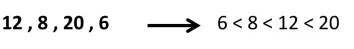

El problema del ordenamiento ha atraído gran cantidad de investigación desde los comienzos de la computación, atracción que perdura hasta hoy, tal vez debido a que, pese a su simple y familiar planteamiento, la complejidad que presenta de resolverlo eficientemente. Por ejemplo, el método de ordenamiento conocido como $Bucket Sort$, un algoritmo de ordenamiento  que se ejecuta de forma lineal.

# **2. BucketSort**

## **2.1. Descripción del algoritmo**

`Bucket Sort` es uno de los algoritmos que solucionan el problema de ordenamiento.

El algoritmo recibe de entrada una lista(o arreglo) $arr$ con una secuencia de $n$ números decimales entre 0.0 y 1.0 en cualquier orden. 

Luego los números dentro de la lista(o arreglo) se ordenan de mayor a menor o de menor a mayor dependiendo del programador. En este caso describiremos el algoritmo al ordenar de menor a mayor

1.   En cada interacción i del Bucket Sort, se crearán 10 bucket para ir guardando los elementos del arreglo.
2.   Cada buckets guardara elementos de cierto rango, el buckets[0] guardara elementos con 0 decenas, el buckets[1] guardara elementos con 1 decenas, ..., el buckets[9] guardara elementos con 9 decenas
3.   Una vez que los números están organizados en sus buckets correspondientes, cada buckets se ordenara con un algoritmo de ordenamiento (en este caso insertion sort).
4.   Ahora que cada buckets esta ordenado, se integran sus elementos en el arreglo, primero se integra el primer elemento de buckets[0], luego su segundo, hasta que se ingresen todos en el arreglo, luego el buckets[1], el buckets[2] hasta que se hayan transferido todos los buckets.

## **2.2. Código**

###*InsertionSort*

In [5]:
def insertionSort(arr, verbose=False): 
    n = len(arr)
    cont = 0 #contador de comparaciones

    if verbose == True: print(f"Arreglo Inicial = {arr}\n")

    # Se recorre el arreglo
    for i in range(1,n):
        
        if verbose == True: print("Pasada ",i)

        aux = arr[i] # Se guarda el i-esimo elemento que podria cambiar de posicion
        j = i - 1

        cont += 1
        
        if verbose == True: 
          print(f"{arr}")
          print(f"Comparación: arr[{j+1}] < arr[{j}] ===> {aux} < {arr[j]}")
          if aux >= arr[j]: print("No hubo cambios")
          
        # Se compara dentro del arreglo
        while j > -1 and aux < arr[j] :# Si el elemento es menor al anterior elemento, se intercambian
            arr[j+1] = arr[j]
            j -= 1
            if j==-1: cont -=1
            if verbose == True: print(f"Arreglo después del cambio {arr}")
            if verbose == True and j!=-1: print(f"Comparación: aux < arr[{j}] ===> {aux} < {arr[j]}")
            cont+= 1
        
        arr[j+1] = aux
        if verbose == True: print(f"Al finalizar pasada: {arr}\n")
    
    if verbose == True:
      for i in range(0,n-1):
          if arr[i] > arr[i+1]: 
              print("\nEl arreglo no se ordenó correctamente")
              break
          if i == n-2: print("\nEl arreglo se ordenó correctamente")
      print(f"Arreglo Final = {arr}")
      

    return cont

# Ejemplo
array = [1,8,3,7,9]
print("Datos de entrada: ",array)
counter = insertionSort(array)
print("Datos de salida: ",array)
print("# comparaciones: ", counter)

Datos de entrada:  [1, 8, 3, 7, 9]
Datos de salida:  [1, 3, 7, 8, 9]
# comparaciones:  6


###*BucketSort*

In [4]:
def bucketSort(array, verbose=False):
    bucket = []

    if verbose:
        print("\n***************************************************BucketSort*******************************************************************")
        print("Lo primero que realiza este algoritmo es crear 10 bucket vacios, ya que trabajaremos con datos [0.0, 1.0[")
        print("El indice de cada valde indica los numeros que guarda (guardan aquellos cuya decima es igual al indice)")

    # Crear un arreglo vacio para buckets
    for i in range(10):
        bucket.append([])
    
    if verbose:
        print("-----------------------------------------------------------------------------------------------")
        print("A continuacion iremos guardando los elementos en los baldes que corresponden (cada balde guarda mas de un elemento)")

    # Insertar elementos en sus respectivos buckets
    for j in array:
        if verbose: print("       --------------------------------------------------")
        index_b = int(10 * j)
        if verbose: print(f"        En el bucket[{index_b}] se guardara {j}")
        bucket[index_b].append(j)
        if verbose: print(f"        El balde {index_b} ahora contiene los siguientes elementos: {bucket[index_b]}")

    if verbose:
        print("-----------------------------------------------------------------------------------------------")
        print("Ahora que los baldes poseen los elementos que les corresponden, debemos ordenarlos")

    # Ordenar elementos por cada bucket
    for i in range(10):
        if verbose: print("       --------------------------------------------------")
        if verbose: print(f"          bucket[{i}] antes de ordenar: {bucket[i]}")
        insertionSort(bucket[i])
        if verbose: print(f"        bucket[{i}] despues de ordenar: {bucket[i]}")

    if verbose:
        print("-----------------------------------------------------------------------------------------------")
        print(f"Para finalizar, insertaremos lo elementos de los baldes en el arreglo {array} de forma ordenada")

    # Obtener los elementos ordenados
    k = 0
    for i in range(10):
        for j in range(len(bucket[i])):
            if verbose: print("       --------------------------------------------------")
            if verbose: print(f"        En array[{k}] se guardara el elemento bucket[{i}][{j}]={bucket[i][j]}")
            if verbose: print(f"        array[{k}] = {bucket[i][j]}")
            array[k] = bucket[i][j]
            k += 1
            if verbose: print(f"        El arreglo ordenado es {array[:k]}")
    
    if verbose:
        print("-----------------------------------------------------------------------------------------------")
        print("Ahora el arreglo original se encuentra ordenado")
        print("***************************************************FIN*******************************************************************\n")


array = [0.42, 0.32, 0.33, 0.52, 0.37, 0.47, 0.51]
print(f"El arreglo es: {array}")
bucketSort(array)
print(f"Al aplicarle BucketSort queda ordenado: {array}")

El arreglo es: [0.42, 0.32, 0.33, 0.52, 0.37, 0.47, 0.51]
Al aplicarle BucketSort queda ordenado: [0.32, 0.33, 0.37, 0.42, 0.47, 0.51, 0.52]


## **2.3. Ejemplo**

Por ejemplo, consideremos el siguiente arreglo

*Entrada:* **a** = $[0.9,0.2,0.6]$

* Crea 10 buckets vacíos

* Agrega los elementos correspondiente a los bukets: 
      El $0.9$ se ingresa al bucket[9].
      El $0.2$ se ingresa al bucket[2].
      El $0.6$ se ingresa al bucket[6].

* Ordena cada buckets con elementos de menor a mayor con insertionSort.

* Ahora ingresa los elementos de los buckets (menor a mayor de acuerdo a su índice, primero el bucket[0], luego bucket[1],..., termina con bucket[9]).

* Al ingresar los elementos de los bucket(0,...,9) que ya están ordenados, el arreglo estará ordenado al finalizar.

*Salida:* **a** = $[0.2,0.6,0.9]$


## **2.4. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo de Insertion Sort.

In [ ]:
import random
import numpy as np
array = np.zeros(5)
for i in range(len(array)):
    array[i] = random.random()

print(f"El arreglo es: {array}")
bucketSort(array,True)
print(f"Al aplicarle BucketSort queda ordenado: {array}")

El arreglo es: [0.23048482 0.59955024 0.82260801 0.83527045 0.56679169]

***************************************************BucketSort*******************************************************************
Lo primero que realiza este algoritmo es crear 10 bucket vacios, ya que trabajaremos con datos [0.0, 1.0[
El indice de cada valde indica los numeros que guarda (guardan aquellos cuya decima es igual al indice)
-----------------------------------------------------------------------------------------------
A continuacion iremos guardando los elementos en los baldes que corresponden (cada balde guarda mas de un elemento)
       --------------------------------------------------
        En el bucket[2] se guardara 0.2304848197903817
        El balde 2 ahora contiene los siguientes elementos: [0.2304848197903817]
       --------------------------------------------------
        En el bucket[5] se guardara 0.5995502384253312
        El balde 5 ahora contiene los siguientes elementos: [0.599550

Al final cada bucket termina guardando números dentro de un rango, los ordena e inserta en el arreglo ordenado

# **3. Correctitud**

##Bucket Sort

### **Teorema (Correctitud).**

*El algoritmo **Bucket Sort** genera 10 buckets(subintervalos) con los elementos del arreglo de entrada donde corresponde, cada bucket se ordena de menor a mayor, es decir,* $a_1\leq a_2 \leq... \leq a_n$, y luego los bucket se ingresan al arreglo desde el bucket[0] al bucket[9].

### **Prueba del Teorema**

Para probar la correctitud de **Bucket Sort** usaremos **inducción matemática** debido a la recursividad del algoritmo.

> En **inducción matemática,** para probar una declaración, o teorema en este caso, para todos los casos posibles, típicamente debemos comprobar si lo siguiente cumple el teorema:
  1. Se prueba **caso base** que debe ser simple.
  2. Se prueba un caso cualquiera que también sea válido para el último caso.

Nuestro teorema dice que $Bucket Sort$ retorna un arreglo ordenado con la secuencia de **n** elementos de entrada, siendo elementos entre $[0.0, 1.0[$


#### **Caso Base**

Probemos como caso base cuando **Bucket Sort** recibe una secuencia de 1 elemento.

Cuando **Bucket Sort** recibe una secuencia de 1 elementos, creara 10 buckets, el elemento ingresara al bucket donde corresponde.

Una vez creados los buckets, se ordenarán aplicando insertionSort(en informe pasado confirmamos su correctitud).

Con los buckets ordenados, se ingresará los elemento de los buckets no vacíos en el arreglo (solo hay un bucket no vacío y tiene un elemento). El arreglo final será igual que el recibido, y estará ordenado, con 1 elemento siempre será ordenado.

#### **Caso cualquiera**

Ahora veremos un caso cualquiera del *Bucket Sort* recibe una secuencia de $n$ elementos.

Cuando **Bucket Sort** recibe una secuencia de $n$ elementos, creará 10 buckets y distribuirá los elementos del arreglo en los bucket que les corresponden.

Bucket[k] contendrá elementos $0.k...$, es decir, $\frac{k}{10} \leq elementos < \frac{k+1}{10}$ con $0.0 \leq k < 10.0$ .

Los elementos siempre encontraran en el bucket correspondiente ya que para decidir donde insertarlos, se multiplica el elemento por $10$, lo que será el número de su décima para usar de indice.

$0.1 * 10 = 1$ el elemento $0.1$ ira al bucket 1.

Una vez creados los buckets, se aplicará insertionSort, algoritmo de ordenamiento correcto, a cada uno, dejando los elementos dentro de los buckets ordenados.

Con los buckets ordenados, se ingresará los elemento de los buckets no vacíos en el arreglo, $bucket[i] ← i=0...9$ . 

El arreglo final contendrá todos los elementos del arreglo recibido de manera ordenada.

# **4. Tiempo de ejecución**

*El algoritmo **Bucket Sort** tiene un **tiempo de ejecución de** $O(n+k)$ en su mejor caso y su caso promedio, pero su peor caso tiene complejidad temporal $O(n^2)$.* 

###Mejor Caso.

Crear los baldes tiene un tiempo complejidad $O(k)$ generalmente, con $k$ siendo el número de baldes creados.

Luego se insertan los $n$ elementos del algoritmo en los baldes correspondientes, tiene complejidad $O(n)$.

Si la distribución es uniforme, entonces cada balde tendrá $\frac{n}{k}$ elementos. Para el mejor caso sería ideal que los baldes queden ordenados al distribuir los elementos del arreglo.

Una vez los baldes tienen sus elementos correspondientes, se recorren los baldes ordenándolos, como son $k$ baldes, tiene complejidad $O(k)$ recorrerlos. Como los baldes están ordenados, el ordenar tiene complejidad $O(1)$. Y este paso tendrá en total complejidad $O(k)$ 

Para el final se ingresan los elementos de los bucket ordenados en el arreglo, se recorren todos los elementos de cada balde, siendo $k$ baldes con $n/k$ elementos, seria complejidad $k * \frac{n}{k} = n$, entonces $O(n)$.

$T(n) = k + k + (k + n) + n = 2n + 3k \Rightarrow O(n+k)$.

###*Caso Promedio.*

Crear los baldes tiene un tiempo complejidad $O(k)$ generalmente, con $k$ siendo el número de baldes creados.

Luego se insertan los $n$ elementos del algoritmo en los baldes correspondientes, tiene complejidad $O(n)$.

Si la distribución es uniforme, entonces cada balde tendrá $\frac{n}{k}$ elementos.

Una vez los baldes tienen sus elementos correspondientes, se recorren los baldes ordenándolos, como son $k$ baldes, tiene complejidad $O(k)$ recorrerlos. Y se ordenan con un algoritmo rápido como **Quick Sort** que tiene un caso promedio de $O(n)$ y los baldes tienen $\frac{n}{k}$ elementos, su ordenamiento con **Quick Sort** tendrá complejidad $O(\frac{n}{k})$, todo el proceso tendría complejidad $k * n/k = n$, entonces $O(n)$. 

Para el final se ingresan los elementos de los bucket ordenados en el arreglo, se recorren todos los elementos de cada balde, siendo $k$ baldes con $n/k$ elementos, seria complejidad $k * n/k = n$, entonces $O(n)$.

$T(n) = k + n + (k + n) + n = 3n + 2k \Rightarrow O(n+k)$.

**Se puede observar que tiene la misma complejidad que el Mejor Caso**


###*Peor Caso.*

Crear los baldes tiene un tiempo complejidad $O(k)$ generalmente, con $k$ siendo el número de baldes creados.

Luego se insertan los $n$ elementos del algoritmo en los baldes correspondientes, tiene complejidad $O(n)$.

Los elementos no están distribuidos uniformemente en los baldes, asi que asumimos el pero caso, los baldes no tienen $\frac{n}{k}$, contienen $n$ elementos.

Una vez los baldes tienen sus elementos correspondientes, se recorren los baldes ordenándolos, como son $k$ baldes, tiene complejidad $O(k)$ recorrerlos. Y se ordenan con un algoritmo no muy rápido como **Insertion Sort**, que tiene un caso promedio de $O(n^2)$ y los baldes tienen $n$ elementos, su ordenamiento con **Insertion Sort** tendrá complejidad $O(n^2)$ y el balde con elementos será $k=1$, todo el proceso tendría complejidad $k * n^2 = 1 * n^2 =n^2$, entonces $O(n^2)$. 

Para el final se ingresan los elementos de los bucket ordenados en el arreglo, se recorren todos los elementos de cada balde, siendo $k$ baldes con $n/k$ elementos, seria complejidad $k * n/k = n$, entonces $O(n)$.

$T(n) = k + n + (n^2) + n = n^2 + 2n + 2k \Rightarrow O(n+k)$.

**En el peor caso, la complejidad depende totalmente del algoritmo utilizado para ordenar los baldes.**

# **5. Experimentos**

## **5.1. Bucket Sort vs Radix Sort vs Counting Sort** (Tiempo de ejecucion)

###*Counting Sort*

In [9]:
import numpy as np

def maxElement(arregloEx):
  max = -1
  for i in range(len(arregloEx)):
    if max < arregloEx[i]: max = arregloEx[i]

  return max

def CountingSort(array, Sorted, max, verbose=False):
  ## Inicializar contador en zeros
  count = np.zeros(max+1)
  count = count.astype("int")
  if verbose: 
    print("Se inicializo el algoritmo en count en zeros.")
    indices = np.arange(0,max+1,1)
    print(f" Arreglo Principal = {array}")
    print(f"  Arreglo Ordenado = {Sorted}")
    print(f"           Indices = {indices}")
    print(f"Arreglo Contadores = {count}")
    print("Cada posicion guarda la cantidad de veces que aparece el numero de su indice en el arreglo principal.")
    print(f"Ejemplo: el 5 aparece 2 veces, entonces count[5] contendra el numero 2.")
    print("----------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Se recorrera {array} de izquierda a derecha para contar las apariciones de cada numero.")

  ## Contar la cantidad de cada elemento en el arreglo principal
  for i in range(0,len(array)):
    if verbose:
        print("---------------------------------------------------------------------------------------------------") 
        print(f"Tomamos el elemento array[{i}] = {array[i]}.")
        print(f"Luego vamos a la posicion {array[i]} en el arreglo contador, y lo aumentamos en 1.")
        print(f"Ya que la posicion guarda la cantidad de veces.\nEl elemento en el indice {array[i]} aumentara.")
        print("      ----------------------------------------------------") 
        print(f"                                       {indices}")
        print(f"        Contadores antes del aumento = {count} -- max={max} -- {array}") 
    count[array[i]] += 1
    if verbose:
        print(f"      Contadores despues del aumento = {count}")
        print("      ----------------------------------------------------")
  

  if verbose:
    print("----------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Se recorrera {count} de izquierda a derecha y cada elemento se le sumara su elemento previo.")
    print(f"De esta forma, cada posicion contendra la cantidad de elementos menores o iguales a su indice.")
  
  ## Cada posicion de count debe tener la cantidad de elementos
  ## menores o iguales al elemento que corresponda dicha posicion
  for i in range(1, len(count)):
    if verbose:
        print("---------------------------------------------------------------------------------------------------") 
        print(f"Tomamos el elemento contadores[{i}] = {count[i]}")
        print(f"Tambien tomemos su elemento previo contadores[{i-1}] = {count[i-1]}")
        print(f"Ahora sumemoslos y posicionemos el resultado en la posicion {i} del arreglo contadores.")
        print(f"{count[i]} + {count[i-1]} = {count[i] + count[i-1]}")
        print("      ----------------------------------------------------") 
        print(f"                                       {indices}")
        print(f"        Contadores antes del aumento = {count}") 
    count[i] += count[i-1]
    if verbose:
        print(f"      Contadores despues del aumento = {count}")
        print("      ----------------------------------------------------")
    


  if verbose:
    print("----------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"Se recorrera {array} de derecha a izquierda.")
    print(f"Se busca el contador del elemento en {count}")
    print(f"Luego se le resta 1 al contador y el nuevo contador sera la posicion del elemento de {Sorted} en el array ordenado.")

  ## Incorpora los datos en el arreglo ordenado.
  for i in range(len(array)-1,0, -1):
    if verbose:
        print("---------------------------------------------------------------------------------------------------") 
        print(f"Tomamos el elemento array[{i}] = {array[i]}.")
        print(f"Conseguimos contador[{array[i]}] = {count[array[i]]}.")
        print(f"Y le restamos 1 contador[{array[i]}] = {count[array[i]] - 1}.")
        print(f"Ahora usamos ese elemento como indice para Ordenado[{count[array[i]] - 1}].")
        print(f"Y posicionamos el elemento del arreglo en esa posicion")
        print("      ----------------------------------------------------") 
        print(f"        Contadores antes del aumento = {count}") 
        print(f"              Arreglo ordenado antes = {Sorted}") 
    count[array[i]] -= 1
    Sorted[count[array[i]]] = array[i]
    if verbose:
        print(f"      Contadores despues del aumento = {count}")
        print(f"            Arreglo ordenado despues = {Sorted}")
        print("      ----------------------------------------------------")
  

  if verbose: print("----------------------------------------------------------------------------------------------------------------------------------------------")  

arr = [5,0,2,3,2,5,4,0,3,3]
arrSort = [0,0,0,0,0,0,0,0,0,0]
max = maxElement(arr)
print("El arreglo de entrada es =", arrSort, "Y su elemento maximo es =", max)
CountingSort(arr, arrSort,max)
print("El arreglo de salida y ordenado es =", arrSort)

El arreglo de entrada es = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Y su elemento maximo es = 5
El arreglo de salida y ordenado es = [0, 0, 2, 2, 3, 3, 3, 4, 0, 5]


###*Radix Sort*

In [10]:
def countingSortOfRadix(arr, exp1):
    n = len(arr)
 
    output = [0] * (n)
 
    count = [0] * (10)
 
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
 
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 

def RadixSort(arr):
    max1 = maxElement(arr)

    exp = 1
    while max1 / exp >= 1:
        countingSortOfRadix(arr, exp)
        exp *= 10
 

arr = [170, 45, 75, 90, 802, 24, 2, 66]
print("El arreglo de entrada es =", arr)
RadixSort(arr)
print("El arreglo de salida y ordenado es =", arr)

El arreglo de entrada es = [170, 45, 75, 90, 802, 24, 2, 66]
El arreglo de salida y ordenado es = [2, 24, 45, 66, 75, 90, 170, 802]


###**Comparación tiempo de ejecución** (Gráfica).

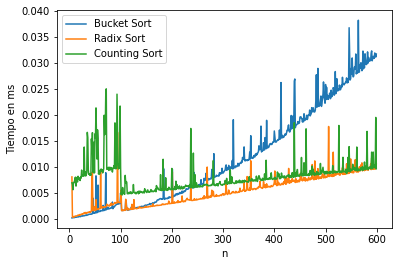

In [14]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import numpy as np

x=[]; y=[]; y1=[]; y2=[]; b=[]

for i in range(4):
    b.append(random.random())

for n in range(5,600):
    a = random.sample(range(1, 1000), n)
    max = maxElement(a)
    b.append(random.random())
    
    #la función repeat está ejecutando 10 veces los algoritmos de ordenamiento con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({b})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import RadixSort", stmt=f"RadixSort({a})", repeat=1, number=10)
    t2 = repeat(setup="from __main__ import CountingSort", stmt=f"CountingSort({a[:]},{a},{max})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)
    y2.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bucket Sort", "Radix Sort", "Counting Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Se puede observar que el **Counitng Sort** es el más lento entre los 3 algoritmos cuando se ordena secuencias de $n$ elementos $n< 100$, mientras que el **Bucket Sort** es el más lento entre los 3 algoritmos cuando se trata de grandes conjuntos de datos. 

**Bucket Sort** siempre utiliza **Insertion Sort** para ordenar los baldes, algoritmo que tiene su caso promedio entre $O(n)$ y $O(n^2)$, además sus baldes no buscan tener la misma cantidad de elementos, haciendo probable que los elementos del arreglo se junten en un único balde, debido a estas razones, el algoritmo es más lento en comparación a los otros, es probable que no se enfrente a sus casos promedio.

Como no se enfrenta a sus casos promedios, su tiempo de ejecución dependerá del algoritmo de ordenamiento que se aplica en los baldes, en este caso **Insertion Sort**.

Aunque la diferencia es menor a 0.1 milisegundo.

## **5.2. Bucket Sort vs Insertion Sort** (Tiempo de ejecucion)

###**Proposito del experimento.**

En los peores casos del **Bucket Sort**, la complejidad que se asume es la del algoritmo que ordena los baldes. En el caso de este informe, **Bucket Sort** utiliza **Insertion Sort** para ordenar sus buckets, como la forma implementada del **Bucket Sort** en este informe produce resultados cercanos al peor caso, su tiempo de ejecución debería ser similar al algoritmo que ordena los baldes, es decir, **Bucket Sort**$≈$**Insertion Sort** en sus tiempos de ejecución.

###**Comparación tiempo de ejecución** (Gráfica).

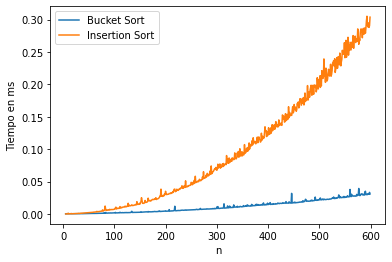

In [15]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
import numpy as np

x=[]; y=[]; y1=[]; a=[]

for i in range(4):
    a.append(random.random())

for n in range(5,600):
    a.append(random.random())

    #la función repeat está ejecutando 10 veces los algoritmos de ordenamiento con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bucket Sort", "Insertion Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Se puede observar que **Bucket Sort** es mucho más rápido que **Insertion Sort** cuando se trata de ordenar el mismo arreglo.

Esto puede ser porque **Bucket Sort**, aunque use **Insertion Sort** para ordenar sus datos, y sea poco probable que se distribuyan los datos uniformemente en los baldes, todavía se distribuirán lo suficiente para que **Insertion Sort** tenga un tiempo de ejecución más rápido que aplicar el algoritmo al arreglo original.

Aunque **Bucket Sort** este en su peor caso donde no distribuya uniformemente sus datos y su complejidad depende del algoritmo que ordena los baldes (*Insertion Sort*), las secuencias en los baldes en la forma que se distribuyeron los elementos son cercanas al mejor caso de **Insertion Sort**.